In [1]:
import pandas as pd
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm

from cate.dataset import Dataset

In [2]:
def to_rank(
    primary_key: pd.Series, score: pd.Series, ascending: bool = True
) -> pd.Series:
    df = pd.DataFrame({primary_key.name: primary_key, score.name: score}).set_index(
        primary_key.name, drop=True
    )
    df = df.sort_values(by=score.name, ascending=ascending)  # type: ignore
    df["rank"] = np.ceil(np.arange(len(df)) / len(df) * 100).astype(int)
    return df["rank"]

In [3]:
base_df = pd.read_csv("/workspace/data/uplift-modeling/criteo-uplift-v2.1.csv")

In [4]:
base_df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,12.616365,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
1,12.616365,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
2,12.616365,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
3,12.616365,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
4,12.616365,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0


In [5]:
ds = Dataset(
    base_df,
    ["f0", "f1", "f2", "f3", "f4", "f5", "f6", "f7", "f8", "f9", "f10", "f11"],
    ["conversion"],
    ["treatment"],
)

In [6]:
pred_dfs = []
skf = StratifiedKFold(5, shuffle=True, random_state=42)
for train_idx, valid_idx in tqdm(skf.split(np.zeros(len(ds)), ds.y)):
    train_X = ds.X.iloc[train_idx]
    train_y = ds.y.iloc[train_idx].to_numpy().reshape(-1)
    train_w = ds.w.iloc[train_idx]
    valid_X = ds.X.iloc[valid_idx]
    valid_y = ds.y.iloc[valid_idx].to_numpy().reshape(-1)
    valid_w = ds.w.iloc[valid_idx]

    model = lgb.LGBMClassifier(importance_type="gain")
    model.fit(train_X, train_y, eval_set=[(valid_X, valid_y)])
    pred = model.predict_proba(valid_X)
    pred_dfs.append(pd.DataFrame({"index": valid_idx, "pred": pred[:, 1]})) # type: ignore

0it [00:00, ?it/s]

[LightGBM] [Info] Number of positive: 32619, number of negative: 11151054
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.387015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1700
[LightGBM] [Info] Number of data points in the train set: 11183673, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002917 -> initscore=-5.834394
[LightGBM] [Info] Start training from score -5.834394


1it [00:24, 24.22s/it]

[LightGBM] [Info] Number of positive: 32619, number of negative: 11151054
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.429425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1708
[LightGBM] [Info] Number of data points in the train set: 11183673, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002917 -> initscore=-5.834394
[LightGBM] [Info] Start training from score -5.834394


2it [00:45, 22.37s/it]

[LightGBM] [Info] Number of positive: 32620, number of negative: 11151054
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.379114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1707
[LightGBM] [Info] Number of data points in the train set: 11183674, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002917 -> initscore=-5.834364
[LightGBM] [Info] Start training from score -5.834364


3it [01:07, 22.20s/it]

[LightGBM] [Info] Number of positive: 32619, number of negative: 11151055
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.485669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1707
[LightGBM] [Info] Number of data points in the train set: 11183674, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002917 -> initscore=-5.834394
[LightGBM] [Info] Start training from score -5.834394


4it [01:27, 21.59s/it]

[LightGBM] [Info] Number of positive: 32619, number of negative: 11151055
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.383020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1703
[LightGBM] [Info] Number of data points in the train set: 11183674, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002917 -> initscore=-5.834394
[LightGBM] [Info] Start training from score -5.834394


5it [01:47, 21.51s/it]


In [7]:
pred_df = pd.concat(pred_dfs, axis=0).set_index("index")
output_df = pd.merge(base_df, pred_df, left_index=True, right_index=True)
rank = to_rank(output_df.index.to_series(), output_df["pred"], ascending=False)
output_df = pd.merge(output_df, rank.to_frame(), left_index=True, right_index=True)

In [8]:
output_df

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure,pred,rank
0,12.616365,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,0.000152,52
1,12.616365,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,0.000183,48
2,12.616365,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,0.000190,47
3,12.616365,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,0.000171,49
4,12.616365,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0,0.000136,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13979587,26.297764,10.059654,9.006250,4.679882,10.280525,4.115453,-3.282109,4.833815,3.839578,13.190056,5.300375,-0.168679,1,0,0,0,0.000539,28
13979588,12.642207,10.679513,8.214383,-1.700105,10.280525,3.013064,-13.955150,6.269026,3.971858,13.190056,5.300375,-0.168679,1,0,0,1,0.000288,39
13979589,12.976557,10.059654,8.381868,0.842442,11.029584,4.115453,-8.281971,4.833815,3.779212,23.570168,6.169187,-0.168679,1,0,1,0,0.029082,2
13979590,24.805064,10.059654,8.214383,4.679882,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0,0.000078,99


In [9]:
cv_list = []
for rank in range(100):
    rank_flg = output_df["rank"] <= rank
    tg_flg = output_df["treatment"] == 1
    cv = (
        output_df.loc[rank_flg & tg_flg, "conversion"].mean()
        - output_df.loc[rank_flg & ~tg_flg, "conversion"].mean()
    )
    cv_list.append(cv)

In [14]:
default_df = pd.Series(cv_list).to_frame()
default_df.columns = ["default"]

In [20]:
cv_df = pd.read_csv("/workspace/outputs/meta_learner.csv", index_col = 0)

In [22]:
cv_df["default"] = default_df

<Axes: >

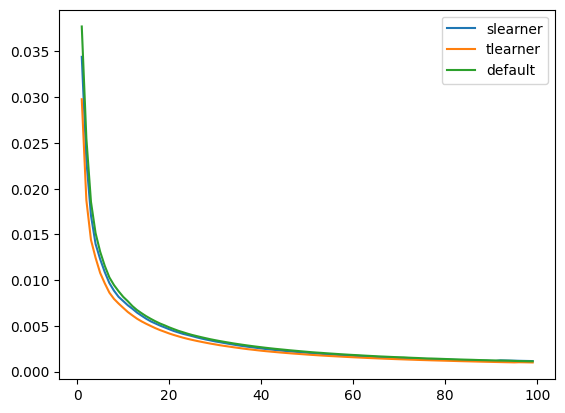

In [24]:
cv_df.plot()

In [28]:
cv_df.iloc[range(0, 100, 10), :]

,slearner,tlearner,default
0,NaN,NaN,NaN
10,0.007726,0.006984,0.008184
20,0.004641,0.004177,0.004847
30,0.003305,0.002981,0.003442
40,0.002536,0.002294,0.002673
50,0.002064,0.001871,0.002172
60,0.001732,0.001576,0.001826
70,0.001502,0.001360,0.001578
80,0.001320,0.001199,0.001387
90,0.001180,0.001069,0.001234
